<img style="float: right;" width="120" src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>

This notebook compares the creation of a neural network model with scikit-learn against Keras/Tensorflow

## 1. Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/mnist8x8.csv')
print(df.shape)
df.head()

(1797, 65)


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## 2. Analyse/Shape/Clean Data

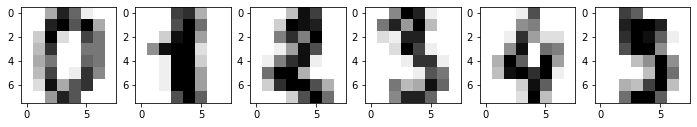

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

num_plots = 6

fig, axes = plt.subplots(1, num_plots, figsize=(12, 7))

for i in range(num_plots):
    data = df.iloc[i, :-1].to_numpy()
    axes[i].imshow( np.reshape(data, (8, 8)), cmap=plt.cm.gray_r )

## 3. Select independent and dependent variables

In [4]:
# define X and y

X = df.iloc[:, :-1]

y = df['label']

## 4. Train-test split

In [5]:
# train-test-split with scikit-learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## 5. Select, configure and train model

In [6]:
# Let's first use the scikit-learn MLP model

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50, 32), max_iter=500)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 32), max_iter=500)

## 6. Verification with a confusion matrix

Confusion matrix:
 [[11  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  1  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  1  0  1  0  0  0  1 20  0]
 [ 0  0  0  0  1  0  0  0  0 23]]
Accuracy: 0.9722222222222222


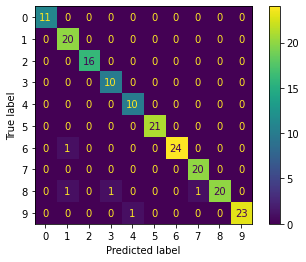

In [7]:
from sklearn import metrics

# scikit learn has some utility functions for dealing with confusion matrices

disp = metrics.plot_confusion_matrix(model, X_test, y_test)

print("Confusion matrix:\n", disp.confusion_matrix)
cmatrix = disp.confusion_matrix

correct = 0
for i in range(len(cmatrix)):
        correct += cmatrix[i][i]

print('Accuracy:', correct / cmatrix.sum())

plt.show()

## 7. For comparison, let's build the same model with Keras/Tensorflow

In [8]:
#!pip install tensorflow keras

In [9]:
import datetime
import tensorflow as tf

# Create a keras Sequential model with 2 hidden layers of size 50 and 32
# we can use another densly connected layer as our output layer of size 10
# for the output layer we can use the softmax activation function


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=64, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(32, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(10, kernel_initializer='normal', activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                3250      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 5,212
Trainable params: 5,212
Non-trainable params: 0
_________________________________________________________________


In [10]:
# we can setup a directory for logs and use the tensorboard to view them if it's available
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# now compile and train the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
 1/51 [..............................] - ETA: 0s - loss: 2.3348 - accuracy: 0.0625WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
51/51 [==============================] - 0s 6ms/step - loss: 1.8936 - accuracy: 0.4508 - val_loss: 1.2878 - val_accuracy: 0.7222
Epoch 2/5
51/51 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.8534 - val_loss: 0.4390 - val_accuracy: 0.8444
Epoch 3/5
51/51 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.9233 - val_loss: 0.2459 - val_accuracy: 0.9389
Epoch 4/5
51/51 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9443 - val_loss: 0.2009 - val_accuracy: 0.9389
Epoch 5/5
51/51 [==============================] - 0s 2ms/step - loss: 0.1589 - 

**Take a look at the classes predicted by the model for the test data**

In [11]:
import numpy as np

# Get the model to predict a class for each row in the test data

predicted = np.argmax(model.predict(X_test), axis=1)
predicted

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 1, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 2, 4, 4,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 0, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7], dtype=int64)

**Consider the accuracy of the model with a confusion matrix**

In [12]:
# we can still use many of the sklearn utilities if they're useful
from sklearn.metrics import confusion_matrix

# create and display a confusion matrix

cmatrix = confusion_matrix(y_test, predicted)

print(cmatrix)

correct = 0
for i in range(len(cmatrix)):
    correct += cmatrix[i][i]
    
print('Accuracy:', correct / cmatrix.sum())

[[11  0  0  0  0  0  0  0  0  0]
 [ 0 19  1  0  0  0  0  0  0  0]
 [ 0  1 15  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  1  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  1  0  0 19  0  0]
 [ 1  1  0  0  0  0  0  1 20  0]
 [ 0  0  0  0  0  1  0  0  0 23]]
Accuracy: 0.9555555555555556


**tensorboard is a tool that can analyse the logs from a training run of a tensorflow model**

In [13]:
%load_ext tensorboard

In [14]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 12812), started 0:01:25 ago. (Use '!kill 12812' to kill it.)